In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scaler import DynamicScaler

# 1. Carregar o dataset
df = pd.read_csv("./data/case_data_science_credit.csv", sep=";")
print(f"Shape do dataset original: {df.shape}")

# 2. Selecionar apenas colunas numéricas (para escalonamento)
num_cols = df.select_dtypes(include=["number"]).columns.tolist()

# Remover colunas específicas
for col in ['client_id', 'target']:
    if col in num_cols:
        num_cols.remove(col)

print(f"Colunas numéricas para escalonamento: {num_cols}")

# 3. Separar em treino e teste
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
print(f"Treino: {df_train.shape}, Teste: {df_test.shape}")

Shape do dataset original: (67463, 18)
Colunas numéricas para escalonamento: ['qtd_restritivos', 'razao_credito_tomado_vs_renda_informada', 'patrimonio_total', 'qtd_atrasos_ultimos_2a', 'valor_total_recuperacoes_ultimos_2a', 'contas_distintas_com_atraso', 'qtd_consultas_ultimos_6m', 'qtd_linhas_credito_abertas', 'saldo_rotativo_total', 'limite_rotativo_total', 'valor_total_emprestimos_tomados', 'taxa_juros_media_emprestimos_tomados']
Treino: (47224, 18), Teste: (20239, 18)


In [2]:
# 4. Aplicar o DynamicScaler no treino
scaler = DynamicScaler(
    strategy="auto",
    shapiro_p_val = 0.01, # se aumentar fica mais restritiva a escolha de StandardScaler()
    serialize=True,
    save_path="scalers.pkl", # arquivo com informações de escalonamento salvas 
    random_state=42
)

scaler.fit(df_train[num_cols])

INFO: Scalers salvos em scalers.pkl


DynamicScaler(extra_scalers=[], ignore_cols=set(), ignore_scalers=set(),
              logger=<Logger scaler (INFO)>, random_state=42,
              save_path=WindowsPath('scalers.pkl'),
              scoring=<function DynamicScaler.__init__.<locals>.<lambda> at 0x0000020A515609D0>,
              serialize=True)

In [3]:
# Relatório das decisões
print("\nResumo das decisões por feature:")
display(scaler.report_as_df())


Resumo das decisões por feature:


,chosen_scaler,validation_stats,ignored,candidates_tried,reason
qtd_restritivos,None,"{'post_std': nan, 'post_iqr': nan, 'post_n_uni...",[],"[PowerTransformer, QuantileTransformer, Robust...",all_rejected
razao_credito_tomado_vs_renda_informada,None,"{'post_std': nan, 'post_iqr': nan, 'post_n_uni...",[],"[PowerTransformer, QuantileTransformer, Robust...",all_rejected
patrimonio_total,PowerTransformer,"{'post_std': 1.0, 'post_iqr': 1.25796611169819...",[],[PowerTransformer],NaN
qtd_atrasos_ultimos_2a,None,"{'post_std': nan, 'post_iqr': nan, 'post_n_uni...",[],"[PowerTransformer, QuantileTransformer, Robust...",all_rejected
valor_total_recuperacoes_ultimos_2a,PowerTransformer,"{'post_std': 1.0, 'post_iqr': 1.21328323139613...",[],[PowerTransformer],NaN
contas_distintas_com_atraso,None,{},[],[],constante
qtd_consultas_ultimos_6m,None,"{'post_std': nan, 'post_iqr': nan, 'post_n_uni...",[],"[PowerTransformer, QuantileTransformer, Robust...",all_rejected
qtd_linhas_credito_abertas,PowerTransformer,"{'post_std': 1.0, 'post_iqr': 1.23769385688904...",[],[PowerTransformer],NaN
saldo_rotativo_total,PowerTransformer,"{'post_std': 1.0, 'post_iqr': 1.31396458552683...",[],[PowerTransformer],NaN
limite_rotativo_total,PowerTransformer,"{'post_std': 1.0, 'post_iqr': 1.45938330005203...",[],[PowerTransformer],NaN


In [4]:
display(df_train[num_cols].head())

# 5. Transformar o conjunto de treino
X_train_scaled = scaler.transform(df_train[num_cols], return_df=True)

print("\nExemplo de dados escalados (treino):")
display(X_train_scaled.head())

,qtd_restritivos,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,saldo_rotativo_total,limite_rotativo_total,valor_total_emprestimos_tomados,taxa_juros_media_emprestimos_tomados
10823,0,31.904233,49591.35011,0,7.037046,0,0,14,9126,7697,5784,11.154593
56039,0,20.329191,58654.77591,1,3075.908451,0,0,8,15137,56296,19462,9.203992
32457,0,32.012076,71289.34266,0,3.766088,0,0,10,604,25222,30348,10.323713
43496,0,20.265629,66101.82345,0,7.138711,0,0,19,10079,62191,19156,8.711736
50204,1,20.363201,70478.22719,1,2.111264,0,0,11,11949,10611,18358,9.587092



Exemplo de dados escalados (treino):


,qtd_restritivos,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,saldo_rotativo_total,limite_rotativo_total,valor_total_emprestimos_tomados,taxa_juros_media_emprestimos_tomados
10823,0,31.904233,-0.728688,0,0.863170,0,0,0.215087,0.529706,-0.776316,5784,11.154593
56039,0,20.329191,-0.364180,1,2.822869,0,0,-1.334301,1.120289,1.434187,19462,9.203992
32457,0,32.012076,0.045879,0,0.282778,0,0,-0.687966,-1.605296,0.458558,30348,10.323713
43496,0,20.265629,-0.111229,0,0.875453,0,0,0.958990,0.639650,1.563984,19156,8.711736
50204,1,20.363201,0.022220,1,-0.308651,0,0,-0.423312,0.834692,-0.464617,18358,9.587092


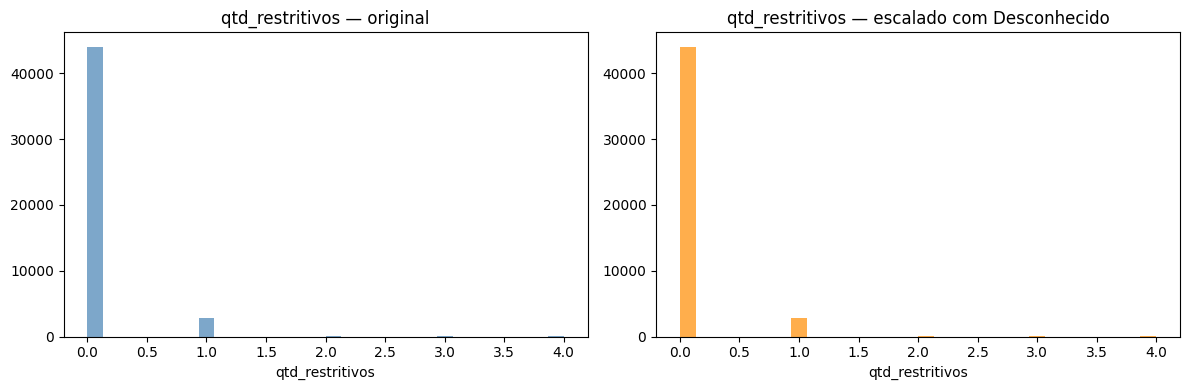

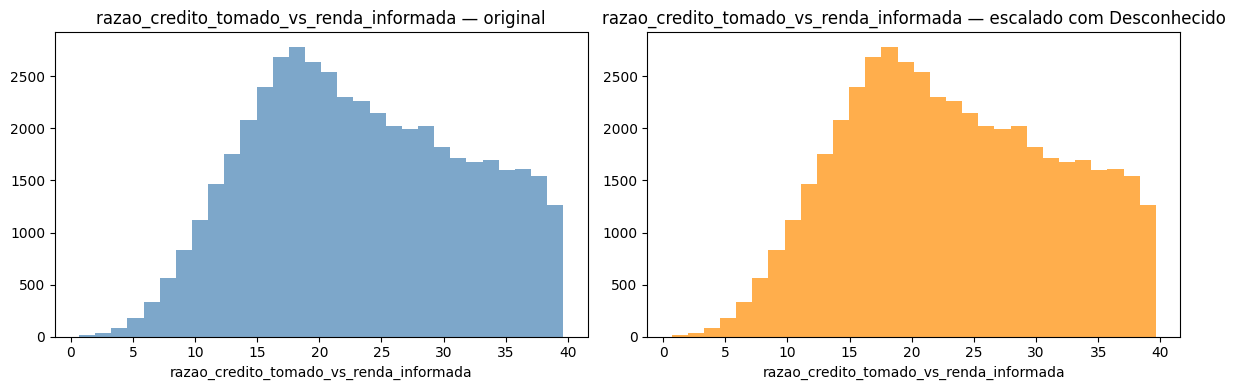

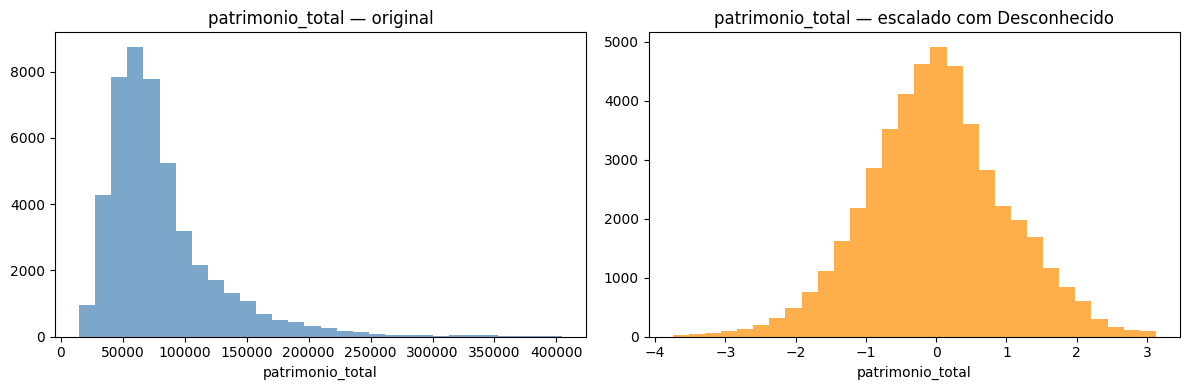

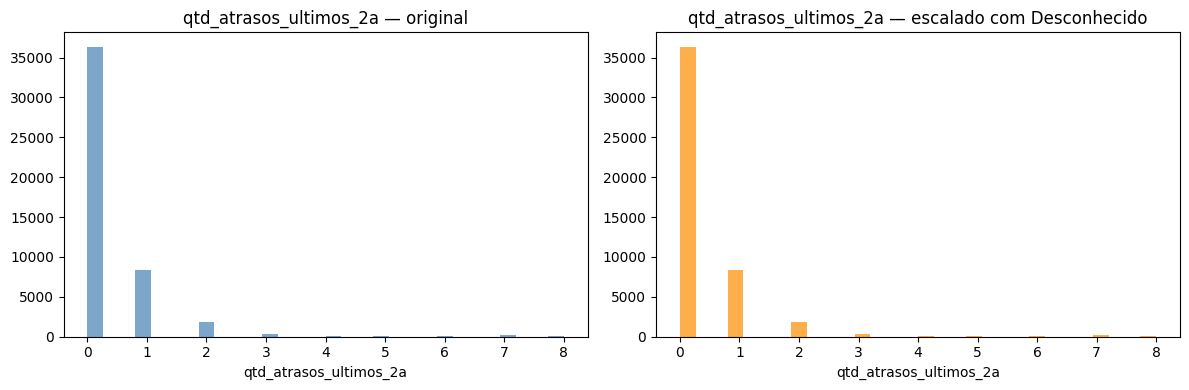

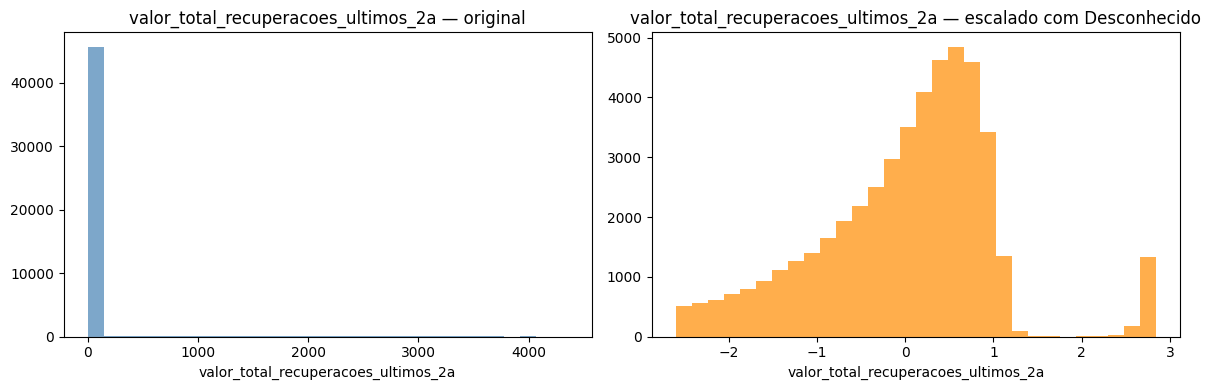

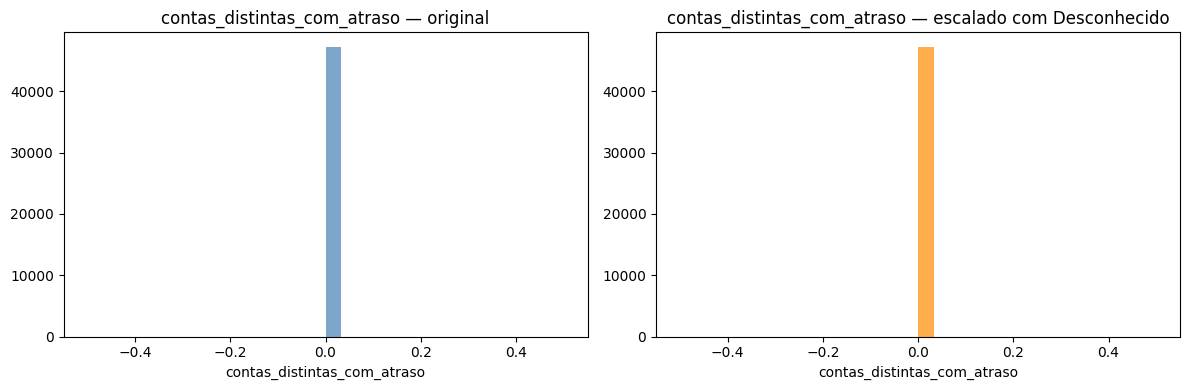

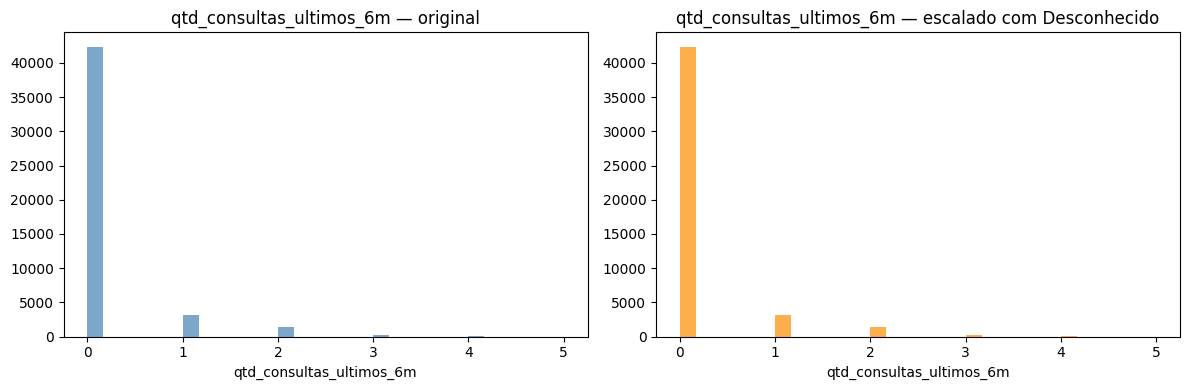

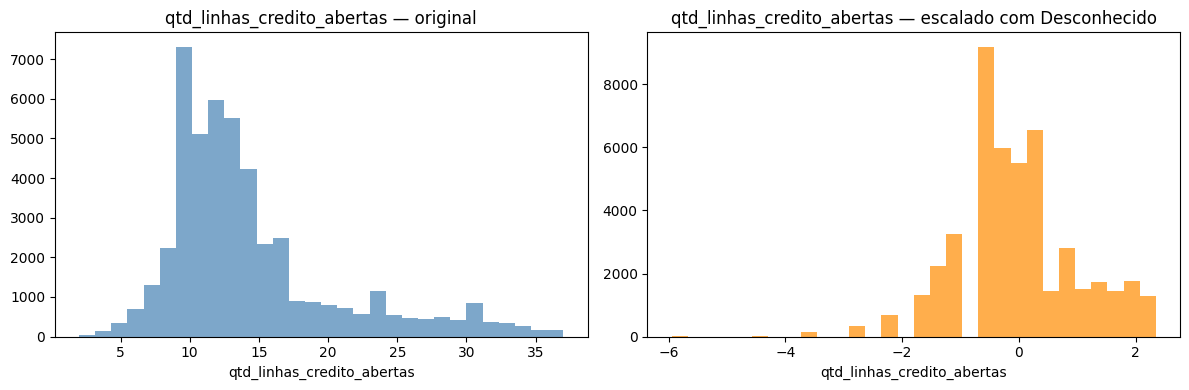

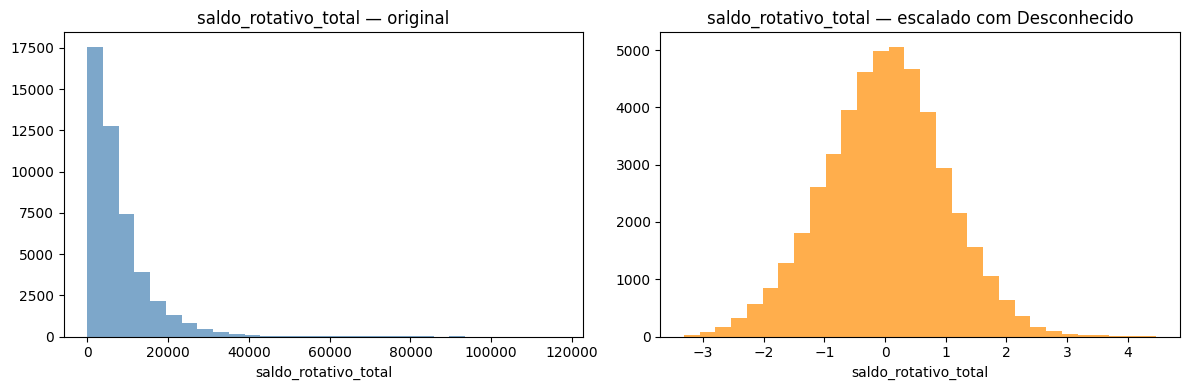

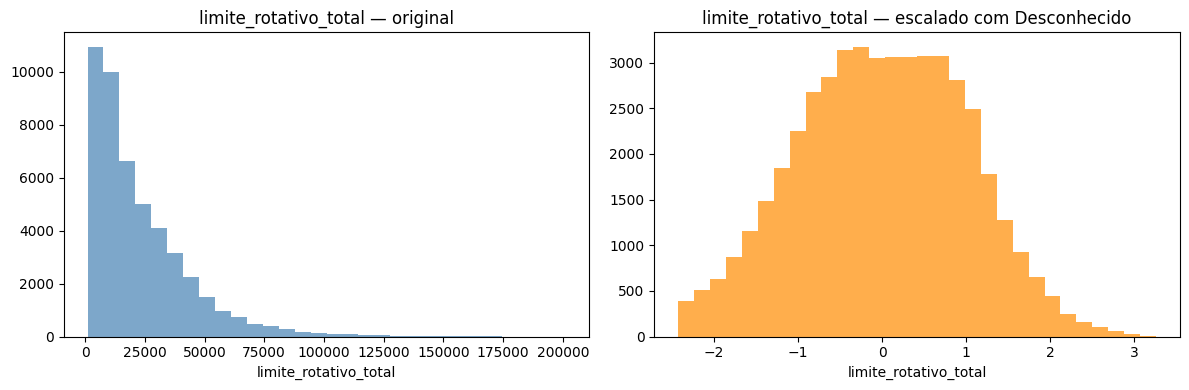

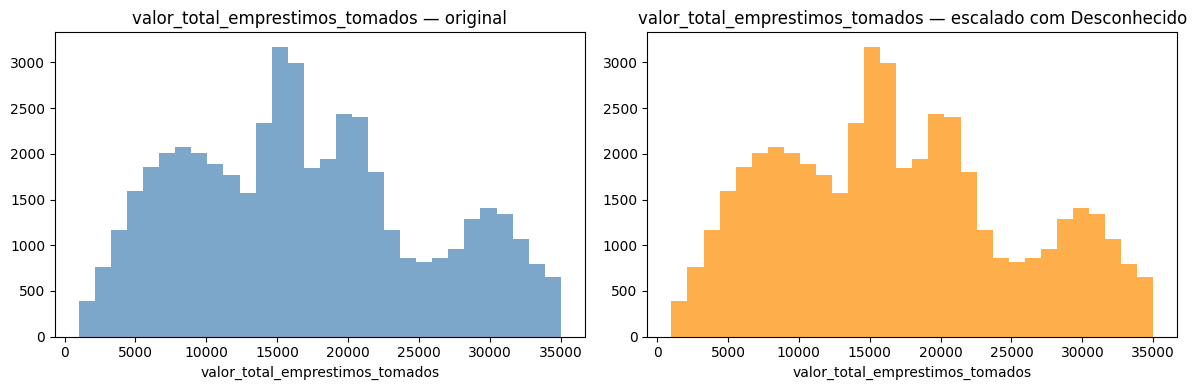

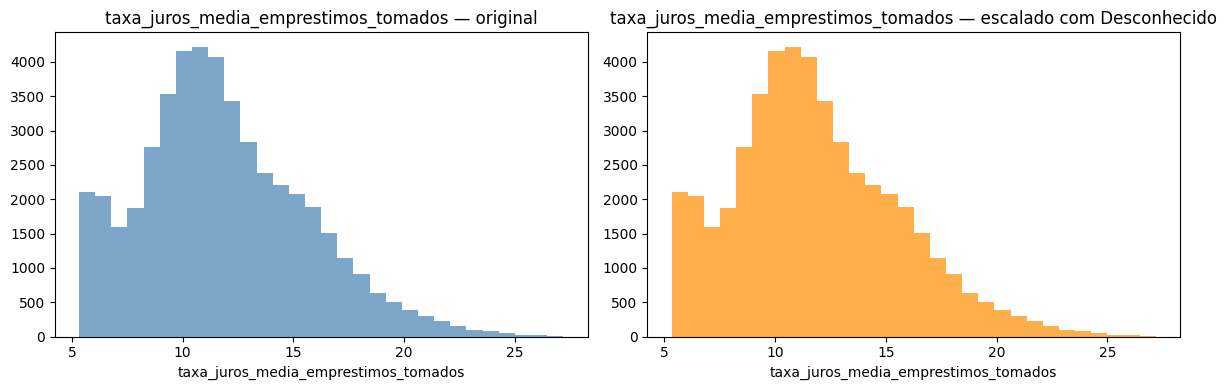

In [7]:
# Visualizar
scaler.plot_histograms(
    df_train,
    X_train_scaled,
    features=num_cols)
        #"patrimonio_total",                 # RobustScaler
        #"qtd_restritivos",                  # QuantileTransformer
        #"valor_total_emprestimos_tomados",  # MinMaxScaler
        #])

In [6]:
# 6. Carregar o scaler salvo e aplicar no teste
scaler_test = DynamicScaler()
scaler_test.load("scalers.pkl")

display(df_test[num_cols].head())

X_test_scaled = scaler_test.transform(df_test[num_cols], return_df=True)

print("\nExemplo de dados escalados (teste):")
display(X_test_scaled.head())

INFO: Scalers carregados de scalers.pkl


,qtd_restritivos,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,saldo_rotativo_total,limite_rotativo_total,valor_total_emprestimos_tomados,taxa_juros_media_emprestimos_tomados
56094,0,17.621745,25906.04772,7,1.810870,0,0,14,5847,20974,8984,6.032459
34597,1,23.674993,92803.30262,0,3.115843,0,0,30,1829,39945,27684,9.384627
1791,0,9.473331,33040.85422,0,5.036486,0,0,9,2829,14142,21374,6.470937
38453,0,6.875724,81012.45458,0,4.207038,0,0,12,5982,35830,32775,18.955803
12959,0,24.763439,98524.20707,0,2.197198,0,0,10,1828,6209,3576,12.644970



Exemplo de dados escalados (teste):


,qtd_restritivos,razao_credito_tomado_vs_renda_informada,patrimonio_total,qtd_atrasos_ultimos_2a,valor_total_recuperacoes_ultimos_2a,contas_distintas_com_atraso,qtd_consultas_ultimos_6m,qtd_linhas_credito_abertas,saldo_rotativo_total,limite_rotativo_total,valor_total_emprestimos_tomados,taxa_juros_media_emprestimos_tomados
56094,0,17.621745,-2.246882,7,-0.467779,0,0,0.215087,0.070013,0.251270,8984,6.032459
34597,1,23.674993,0.577919,0,0.092582,0,0,1.940999,-0.908889,1.002187,27684,9.384627
1791,0,9.473331,-1.657286,0,0.562918,0,0,-0.988538,-0.575353,-0.172115,21374,6.470937
38453,0,6.875724,0.306952,0,0.391337,0,0,-0.187790,0.092324,0.870085,32775,18.955803
12959,0,24.763439,0.695132,0,-0.267226,0,0,-0.687966,-0.909284,-0.976287,3576,12.644970
